In [1]:
import matplotlib.pyplot as plt

# auto reload
%load_ext autoreload
%autoreload 2

In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

torch.set_grad_enabled(False)

/mnt/miniconda3/envs/sae_reasoning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Fetching 2 files: 100%|██████████| 2/2 [01:23<00:00, 41.69s/it]
Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]


Loaded pretrained model deepseek-ai/DeepSeek-R1-Distill-Qwen-7B into HookedTransformer


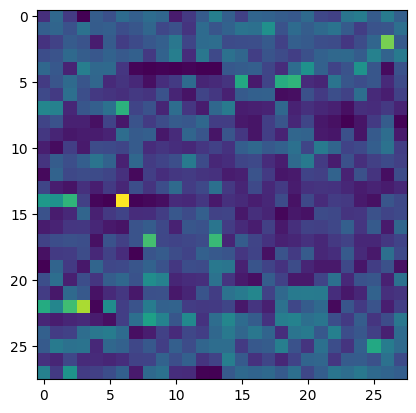

In [3]:
from transformer_lens.head_detector import detect_head
from transformer_lens import HookedTransformer

# model_alias, model_path = 'llama-8B', r"deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
# model_alias, model_path = 'qwen-1p5B', r"deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
model_alias, model_path = 'qwen-7B', r"deepseek-ai/DeepSeek-R1-Distill-Qwen-7B" 

model = HookedTransformer.from_pretrained_no_processing(
    model_path,
    dtype=torch.bfloat16,
    device=device,
)

prompts = [
    "one two three one two three one two three",
    "1 2 3 4 5 1 2 3 4 1 2 3 1 2 3 4 5 6 7",
    "green ideas sleep furiously; green ideas don't sleep furiously"
]

# head_scores = detect_head(model, prompts, "induction_head", exclude_bos=False, exclude_current_token=False, error_measure="abs")
head_scores = detect_head(model, prompts, "induction_head")
head_scores = head_scores.to(torch.float32).detach().cpu().numpy()
plt.imshow(head_scores)

In [11]:
from utils.utils_MI import get_topk_head_pos

topk_coords, topk_values = get_topk_head_pos(head_scores)
topk_coords

[(14, 6),
 (22, 3),
 (2, 26),
 (17, 8),
 (22, 2),
 (17, 13),
 (14, 2),
 (5, 19),
 (7, 6),
 (5, 18)]